## Cálculo de la salida del sistema (800_Ejercicio_1)

Ahora vamos a considerar un sistema de tiempo discreto (señal digital) lineal e invariante en el tiempo y
causal, por ejemplo la respuesta acustica de un recinto frente a un estimulo sonoro con:

* Señal de entrada x[n].
* Respuesta al impulso del recinto h[n].
* La respuesta del recinto frente al estimulo x[n] es igual a la convolución de tiempo
discreto h[n]*[n].

Descargue del siguiente link http://www.openairlib.net/ una respuesta al impulso y una señal anecoica.
A partir de estos dos archivos diseñe un script que convoluciones dichas señales y obtener la señal
como si se ejecutara en dicho recinto. Como se demostrará en futuras unidades la convolucion es
costosa computacionalmente hablando, para realizar dicho procedimiento se utilizara propiedades de la
Transformada de Fourier, de modo de aumentar el rendimiento en los calculos.

In [1]:
import numpy as np  # Importar librerias
import sounddevice as sd
import soundfile as sf
import time
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
x, fsX = sf.read('clarinete.wav')  # Importar los audios
x = x[0:int(len(x)/2)]  # Tomo solo la primera mitad del audio ya que era inecesariamente largo
h, fsH = sf.read('Mono.wav')

In [3]:
t = time.time()
y = np.convolve(0.1*x, h)  # Convolución con Numpy (Modificar la amplitud para que no se sature)
dt = time.time() - t
print('Tiempo transcurrido con la convolución de Numpy:', dt, 's')

Tiempo transcurrido con la convolución de Numpy: 69.7566442489624 s


In [4]:
t1 = time.time()
y = signal.fftconvolve(x,h)  # Convolución con Scipy
dt1 = time.time() - t1

print('Tiempo transcurrido con la función de Scipy:', dt1, 's')

Tiempo transcurrido con la función de Scipy: 0.16452407836914062 s


In [5]:
x2 = np.append(x, np.zeros(len(y)-len(x)))
ysum = 0.5*x2 + 0.5*y  # Señal 50% ancoica y 50% reverberante

In [6]:
# Reproducción de audios
print('Reproduciendo señal anecoica')
sd.play(0.3*x, fsX)
sd.wait()
print('Reproduciendo respuesta al impulso')
sd.play(h, fsH)
sd.wait()
print('Reproduciendo señal reverberante')
sd.play(0.3*y, fsX)
sd.wait()
print('Reproduciendo señal suma')
sd.play(0.3*ysum, fsX)
sd.wait()


Reproduciendo señal anecoica
Reproduciendo respuesta al impulso
Reproduciendo señal reverberante
Reproduciendo señal suma


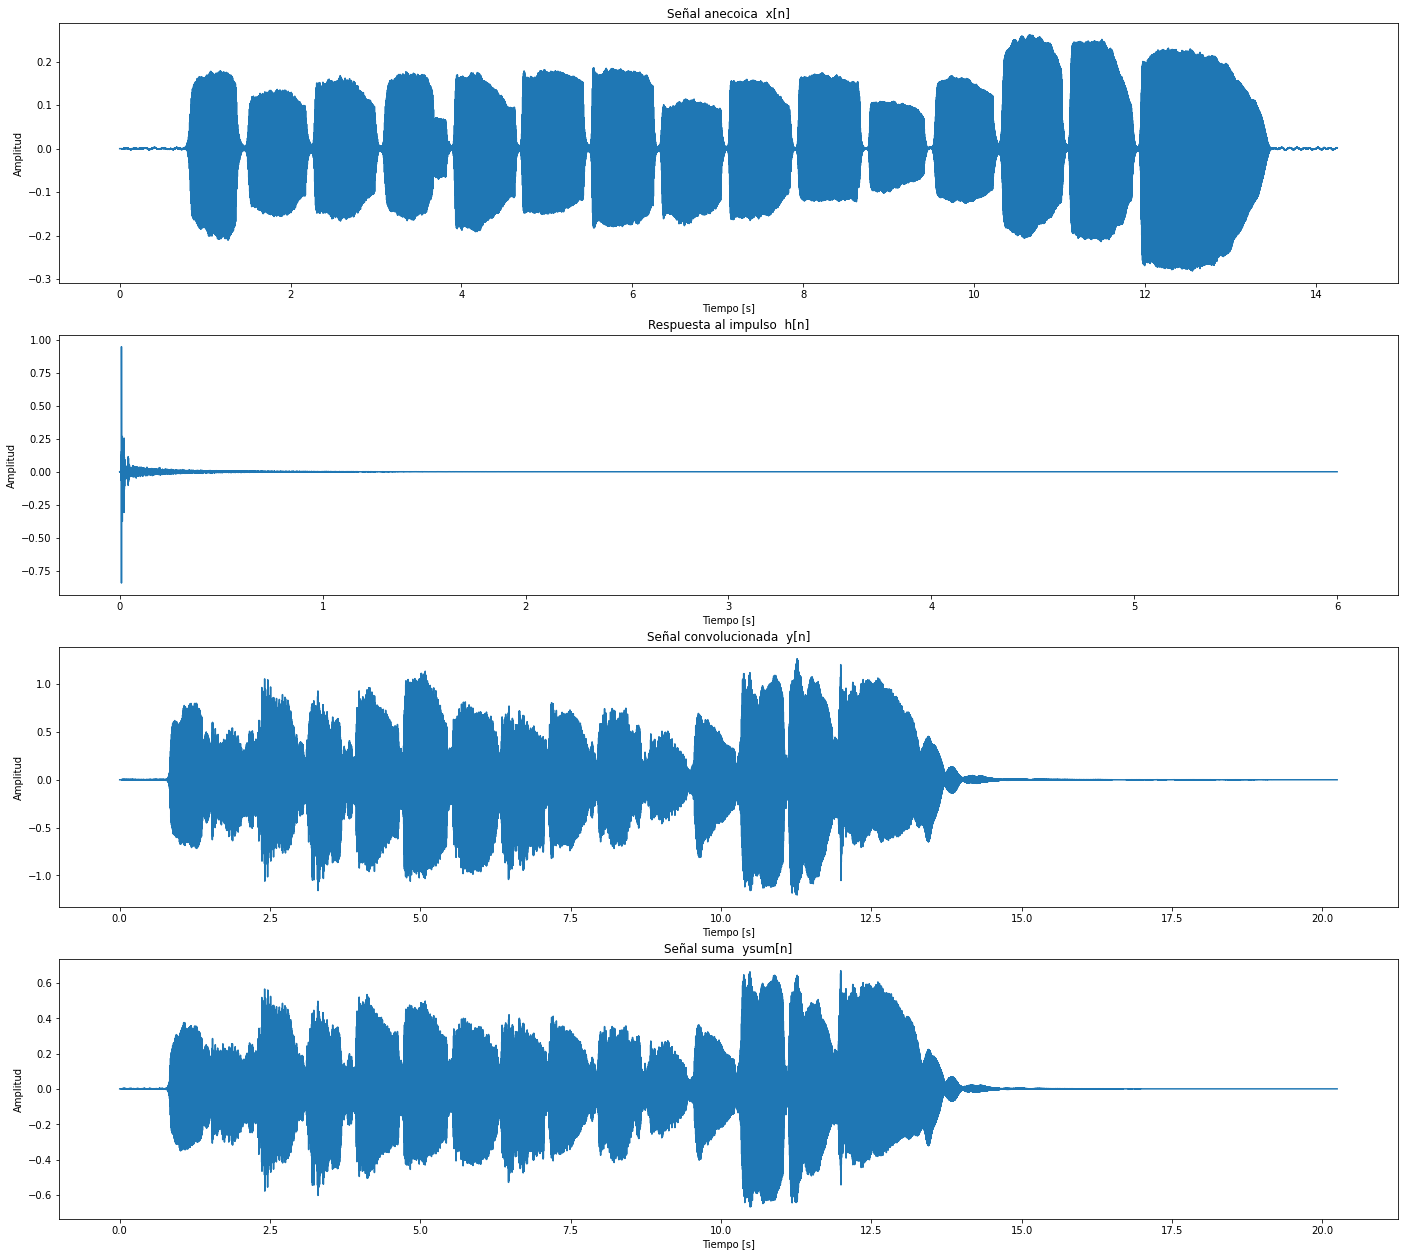

In [11]:
# Plot

fig, ax = plt.subplots(4, frameon=False, figsize=(24, 22))

tX = np.arange(0, len(x)/fsX, 1/fsX)
ax[0].plot(tX,x)
ax[0].set_title('Señal anecoica  x[n]')

tH = np.arange(0, len(h)/fsH, 1/fsH)
ax[1].plot(tH,h)
ax[1].set_title('Respuesta al impulso  h[n]')

tY = np.arange(0, len(y)/fsX, 1/fsX)
ax[2].plot(tY,y)
ax[2].set_title('Señal convolucionada  y[n]')

tYsum = np.arange(0, len(ysum)/fsX, 1/fsX)
ax[3].plot(tYsum,ysum)
ax[3].set_title('Señal suma  ysum[n]')

for i in range(0, 4):
    ax[i].set_ylabel('Amplitud')
    ax[i].set_xlabel('Tiempo [s]')


In [10]:
# Exportar audio
sf.write('Señal convolucionada.wav', y, fsX)